In [1]:
#2021.07.01. THUR
#Hankyeong

##CH.06 ResNet 
#00. 패키지 호출 
from glob import glob
import numpy as np 
import pandas as pd
import warnings 
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions
from tensorflow.keras.applications.resnet import ResNet101, decode_predictions
from PIL import Image
import matplotlib.pyplot as plt

#00-1. 시각화 옵션 설정하기. 
%matplotlib inline 

#00-2. warning message ignore
warnings.filterwarnings(action='ignore')

In [2]:
#01. 데이터셋 불러오기 및 전처리하기. 
#(1) 데이터셋 불러오기. 
file_list = glob('../../data/animals/*')
file_list

['../../data/animals\\bear.jpeg',
 '../../data/animals\\cat.jpeg',
 '../../data/animals\\crocodile.jpeg',
 '../../data/animals\\dog.jpeg',
 '../../data/animals\\dolphin.jpeg',
 '../../data/animals\\eagle.jpeg',
 '../../data/animals\\elephant.jpeg',
 '../../data/animals\\hawk.jpeg',
 '../../data/animals\\lion.jpeg',
 '../../data/animals\\penguin.jpeg',
 '../../data/animals\\shark.jpeg',
 '../../data/animals\\sparrow.jpeg']

In [3]:
#(2) file의 이름명 추출하기. 
name_list = []
for file_name in file_list :
    name = file_name.split('\\')[1].split('.')[0]
    name_list.append(name)

#(3) 추출한 이름명 확인하기. 
print(name_list)

['bear', 'cat', 'crocodile', 'dog', 'dolphin', 'eagle', 'elephant', 'hawk', 'lion', 'penguin', 'shark', 'sparrow']


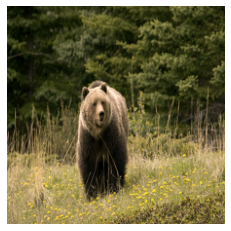

In [4]:
#(4) 첫 번째 파일 사진 확인하기. 
img = np.array(Image.open(file_list[0]).resize((224,224)))
plt.imshow(img)
plt.axis('off')
plt.show()

In [5]:
#02. ResNet50으로 이미지 사진 분류하기.  
#(1) 객체 설정하기. 
resnet50 = ResNet50()

#(2) 객체 요약 정보 확인하기. 
resnet50.summary()

[0][0]           
__________________________________________________________________________________________________
conv4_block1_1_bn (BatchNormali (None, 14, 14, 256)  1024        conv4_block1_1_conv[0][0]        
__________________________________________________________________________________________________
conv4_block1_1_relu (Activation (None, 14, 14, 256)  0           conv4_block1_1_bn[0][0]          
__________________________________________________________________________________________________
conv4_block1_2_conv (Conv2D)    (None, 14, 14, 256)  590080      conv4_block1_1_relu[0][0]        
__________________________________________________________________________________________________
conv4_block1_2_bn (BatchNormali (None, 14, 14, 256)  1024        conv4_block1_2_conv[0][0]        
__________________________________________________________________________________________________
conv4_block1_2_relu (Activation (None, 14, 14, 256)  0           conv4_block1_2_bn[0][0]   

In [6]:
#(3) 첫 번째 파일 사진 분류값 확인하기. 
yhat = resnet50.predict(img.reshape(-1, 224, 224, 3))
label = decode_predictions(yhat)
label = label[0][0]
print(f'{label[1]} ({label[2]*100:.2f}%)')

ice_bear (94.90%)


In [7]:
#(4) 전체 사진 분류하기. 
clf_resnet50_list = []
for file in file_list :
    img = np.array(Image.open(file).resize((224,224)))
    yhat = resnet50.predict(img.reshape(-1, 224, 224, 3))
    label = decode_predictions(yhat)
    clf_resnet50_list.append(label[0][0][1])

In [8]:
#02. ResNet101으로 이미지 사진 분류하기.  
#(1) 객체 설정하기. 
resnet101 = ResNet101()

#(2) 객체 요약 정보 확인하기. 
resnet101.summary()

n[0][0]         
__________________________________________________________________________________________________
conv4_block17_out (Activation)  (None, 14, 14, 1024) 0           conv4_block17_add[0][0]          
__________________________________________________________________________________________________
conv4_block18_1_conv (Conv2D)   (None, 14, 14, 256)  262400      conv4_block17_out[0][0]          
__________________________________________________________________________________________________
conv4_block18_1_bn (BatchNormal (None, 14, 14, 256)  1024        conv4_block18_1_conv[0][0]       
__________________________________________________________________________________________________
conv4_block18_1_relu (Activatio (None, 14, 14, 256)  0           conv4_block18_1_bn[0][0]         
__________________________________________________________________________________________________
conv4_block18_2_conv (Conv2D)   (None, 14, 14, 256)  590080      conv4_block18_1_relu[0][0] 

In [9]:
#(3) 첫 번째 파일 사진 분류값 확인하기. 
yhat = resnet101.predict(img.reshape(-1, 224, 224, 3))
label = decode_predictions(yhat)
label = label[0][0]
print(f'{label[1]} ({label[2]*100:.2f}%)')

jay (87.45%)


In [10]:
#(4) 전체 사진 분류하기. 
clf_resnet101_list = []
for file in file_list :
    img = np.array(Image.open(file).resize((224,224)))
    yhat = resnet101.predict(img.reshape(-1, 224, 224, 3))
    label = decode_predictions(yhat)
    clf_resnet101_list.append(label[0][0][1])

#03. 실제값과 각 분류 값 비교하기
result = pd.DataFrame({
    'answer'        : name_list,
    'clf_resnet50'  : clf_resnet50_list,
    'clf_resnet101' : clf_resnet101_list
})
result

,answer,clf_resnet50,clf_resnet101
0,bear,ice_bear,ice_bear
1,cat,tabby,tabby
2,crocodile,American_alligator,triceratops
3,dog,Saint_Bernard,Tibetan_terrier
4,dolphin,Weimaraner,Weimaraner
5,eagle,kite,kite
6,elephant,cardigan,cardigan
7,hawk,kite,kite
8,lion,Lhasa,miniature_schnauzer
9,penguin,king_penguin,king_penguin
